In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SF Temps

In [13]:
from vega_datasets import data
sf_temps = data.sf_temps()
sf_temps = sf_temps.set_index('date').sort_index()
sf_temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

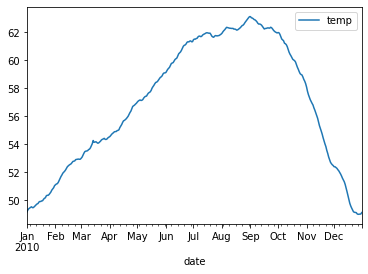

In [21]:
sf_temps.resample('D').mean().plot()

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

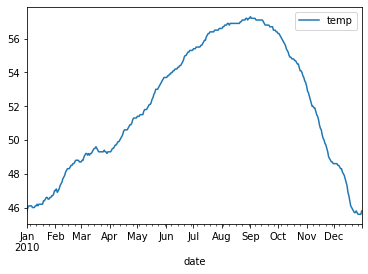

In [22]:
sf_temps.resample('D').min().plot()

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

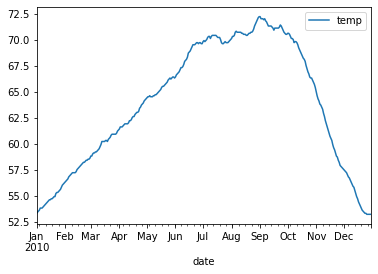

In [23]:
sf_temps.resample('D').max().plot()

Which month is the coldest, on average?

In [38]:
sf_temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [35]:
month = sf_temps.resample('M').mean().reset_index()
month[['date', 'temp']][month['temp'] == month['temp'].min()]

,date,temp
0,2010-01-31,49.98414


Which month has the highest average temperature?

In [39]:
month[['date', 'temp']][month['temp'] == month['temp'].max()]

,date,temp
8,2010-09-30,62.487083


Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [65]:
day = sf_temps['temp'].resample('D').agg(['max', 'min'])
day['variation'] = day['max'] - day['min']
month = day[['variation']].resample('M').mean()
month[['variation']][month['variation'] == month['variation'].max()]

,variation
date,
2010-09-30,14.403333


Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

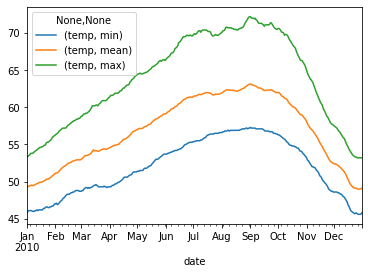

In [67]:
sf_temps.resample('D').agg(['min', 'mean', 'max']).plot()

# Seattle Weather

In [14]:
from vega_datasets import data
seattle = data.seattle_weather()
seattle = seattle.set_index('date').sort_index()
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


Which year and month combination has the highest amount of precipitation?

In [77]:
month = seattle.resample('M').sum()
month[['precipitation']][month['precipitation'] == month['precipitation'].max()]

,precipitation
date,
2015-12-31,284.5


Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

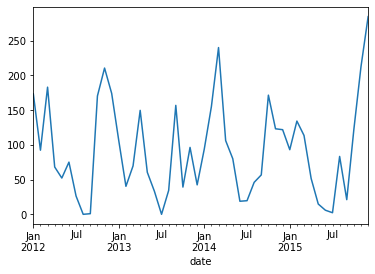

In [84]:
seattle['precipitation'].resample('M').sum().plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

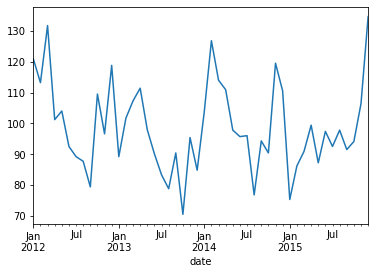

In [80]:
seattle['wind'].resample('M').sum().plot()

Which year-month combination is the windiest?

In [85]:
month[['wind']][month['wind'] == month['wind'].max()]

,wind
date,
2015-12-31,134.6


What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [110]:
seattle['is_sunny'] = seattle['weather'] == 'sun'
sunny = seattle[['is_sunny']].resample('Y').sum()
sunny[sunny['is_sunny'] == sunny['is_sunny'].max()]

,is_sunny
date,
2014-12-31,211


In which month does it rain the most?

# REDO

In [113]:
seattle['raining'] = seattle['weather'] == 'rain'
raining = seattle[['raining']].resample('M').sum()
raining[raining['raining'] == raining['raining'].max()]

,raining
date,
2012-11-30,25


Which month has the most number of days with a non-zero amount of precipitation?

# REDO

In [112]:
seattle['has_precipitation'] = seattle['precipitation'] > 0
precip = seattle[['has_precipitation']].resample('M').sum()
precip[precip['has_precipitation'] == precip['has_precipitation'].max()]

,has_precipitation
date,
2012-12-31,27


# Flights

In [140]:
flights = data.flights_20k()
# flights = flights.set_index('date').sort_index()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


Convert any negative delays to 0.

In [141]:
flights['delay'][flights['delay'] < 0] = 0
flights

<ipython-input-141-f1e8a1670d6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['delay'][flights['delay'] < 0] = 0


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


Which hour of the day has the highest average delay?

In [157]:
flights['hour'] = flights.date.dt.hour
flights.groupby('hour')[['delay']].mean().sort_values('delay', ascending=False).head(1)

,delay
hour,
3,302.5


Does the day of the week make a difference in the delay amount?

In [164]:
flights['day'] = flights.date.dt.day_name()
flights.groupby(['day', 'hour'])[['delay']].mean().sort_values('delay', ascending=False)

,,delay
day,hour,
Friday,3,360.000000
Sunday,0,260.000000
Tuesday,3,245.000000
Thursday,0,184.333333
Friday,1,170.000000
...,...,...
Saturday,5,1.000000
Wednesday,5,0.000000
Tuesday,5,0.000000


Does the month make a difference in the delay amount?

In [170]:
flights['month'] = flights.date.dt.month
flights.groupby(['month', 'hour'])[['delay']].mean().sort_values('delay', ascending=False)

delay
month hour            
2     3     360.000000
1     3     245.000000
      1     170.000000
2     0     167.000000
3     0     123.500000
...                ...
2     6       2.375405
3     6       2.360947
1     5       0.777778
3     5       0.705882
2     5       0.000000

[63 rows x 1 columns]

# Bonus

In [11]:
from vega_datasets import data
iowa = data.iowa_electricity()
iowa = iowa.set_index('year').sort_index()
iowa

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574
2002-01-01,Renewables,1963
2003-01-01,Fossil Fuels,36234
2003-01-01,Nuclear Energy,3988
2003-01-01,Renewables,1885


For each row, calculate the percentage of the year's total that energy source provided.

Lineplot of generation over time, color by source

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

Is the total generation increasing over time?

How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total